# An Analysis of Marketing Metrics
## Their Impact on Actual Sales Units
### Team X: Scott Virshup, Sarah Gustafson, Dane Hamlett, Jasmine Zou, and Yiyi Han

## Table of Contents<a id='back to top'></a>

1. [Libraries](#link1)
1. [Load Data](#link2)
1. [Clean The Data](#link3)
1. [Exploring The Data](#link4)
1. [Model Development](#link5)
    1. [Model 1](#link5a)
    1. [Model 2](#link5b)
    1. [Model 3](#link5c)
1. [Model Interpretation](#link6)
    1. [Limitations](#link6a)
    1. [Recommendations to a Marketing Manager](#link6b)

# Libraries<a id='link1'></a>
[Back to Top](#back to top)

In [1]:
# Data Architecture
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

# Model Building
import statsmodels.formula.api as smf
import statsmodels.api as sm

/Users/scottvirshup/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Here is another helpful link that was used in the creation of this notebook:
* https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

# Load Data<a id='link2'></a>
[Back to Top](#back to top)

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/svirshup/Application-Domains/master/data.csv"); data.head()

,Week,Constant,Sales,Average_Price,Sales Units,TV GRP,Display Impressions,Search Clicks,Distribution (ACV),Price Reduction Units,Trade Promotions Units,Seasonality,CPI,Coupons
0,1,2000000.0,"$2,112,912",$3.03,"697,331",75,"51,519","10,655",52,53,84,91,88,"1,000,000"
1,2,NaN,"$2,170,007",$2.99,"725,755",107,"89,193","15,214",73,93,92,60,74,-
2,3,NaN,"$2,284,844",$2.90,"787,877",98,"65,084","18,146",60,57,56,67,98,-
3,4,NaN,"$2,257,913",$3.03,"745,186",149,"55,083","19,640",93,75,81,71,69,-
4,5,NaN,"$2,257,829",$3.05,"740,272",108,"50,503","17,747",57,95,88,82,75,-


# Clean The Data<a id='link3'></a>
[Back to Top](#back to top)

In [27]:
# Drop a couple of columns
columns_to_drop = ['Week','Constant','Sales']
data = data.drop(columns_to_drop, axis=1)


# Convert data types to int64 where appropriate
data['Average_Price'] = pd.to_numeric(data['Average_Price'].str.replace('$', ''))
data['Sales Units'] = pd.to_numeric(data['Sales Units'].str.replace(',', ''))
data['Display Impressions'] = pd.to_numeric(data['Display Impressions'].str.replace(',', ''))
data['Search Clicks'] = pd.to_numeric(data['Search Clicks'].str.replace(',', ''))
data['Coupons'] = np.where(data['Coupons'].str.contains('-'),'0',data['Coupons'])
data['Coupons'] = pd.to_numeric(data['Coupons'].str.replace(',', ''))


# rename some column headings so there are no spaces and easier to reference
data = data.rename(index=str, columns={"Sales Units": "Sales_Units"})
data = data.rename(index=str, columns={"TV GRP": "TV_GRP"})
data = data.rename(index=str, columns={"Display Impressions": "Display_Impressions"})
data = data.rename(index=str, columns={"Search Clicks": "Search_Clicks"})
data = data.rename(index=str, columns={"Distribution (ACV)": "Distribution_ACV"})
data = data.rename(index=str, columns={"Price Reduction Units": "Price_Reduction_Units"})
data = data.rename(index=str, columns={"Trade Promotions Units": "Trade_Promotions_Units"})

data.sample(10)

,Average_Price,Sales_Units,TV_GRP,Display_Impressions,Search_Clicks,Distribution_ACV,Price_Reduction_Units,Trade_Promotions_Units,Seasonality,CPI,Coupons
0,3.03,697331,75,51519,10655,52,53,84,91,88,1000000
1,2.99,725755,107,89193,15214,73,93,92,60,74,0
2,2.90,787877,98,65084,18146,60,57,56,67,98,0
3,3.03,745186,149,55083,19640,93,75,81,71,69,0
4,3.05,740272,108,50503,17747,57,95,88,82,75,0


# Explore The Data<a id='link4'></a>
[Back to Top](#back to top)

### Description of Input Variables
* Average_Price
    * This variable represents the average price of the product across all product categories & UPCs.
* Sales_Units
    * This variable represents the sales measured in units sold on a weekly basis.
* TV_GRP
    * This variable represents the weekly GRPs for TV bought by the brand. The GRPs can be translated into impressions using the following conversion rate: 1 GRP = 1,200,000 impressions.
* Display_Impressions
    * The variable represents the weekly ad impressions for the brand through banner ads on websites or mobile phone apps.
* Search_Clicks
    * This variable represents the paid search advertisement done by the brand on Google and Bing. The metric measures the clicks done by users on the ads.
* Distribution_ACV
    * This variable is an index variable that represents the comparative distribution levels of a product across various weeks of data. An index of 100 implies the maximum distribution of the product. All other distribution numbers are scaled down based on a maximum distribution of 100.
* Price_Reduction_Units
    * This variable is an index variable that represents the temporary price reduction levels of a product across various weeks of data. An index of 100 implies the maximum number of units under temporary price reductions of the product. 
* Trade_Promotions_Units
    * This variable is an index variable that represents the Trade Promotions levels of a product across various weeks of data. An index of 100 implies the maximum number of units under trade promotions for the product. 
* Seasonality
    * This variable is an index variable that represents the seasonality associated with the consumer demand for this product.
* CPI
    * This variable is an index variable that represents the Consumer Price Index for this product's market. The CPI variable represents the cost of essential goods for an average household.
* Coupons
    * The coupons represents various weeks where the manufacturer circulate coupons at various retail outlets where this product is sold. These coupons are typically valid for a duration of 4 - 8 weeks.

In [29]:
data.describe()

,Average_Price,Sales_Units,TV_GRP,Display_Impressions,Search_Clicks,Distribution_ACV,Price_Reduction_Units,Trade_Promotions_Units,Seasonality,CPI,Coupons
count,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.97300,746931.033333,72.300000,68353.366667,15554.800000,73.100000,76.033333,76.833333,71.000000,76.566667,66666.666667
std,0.05497,37865.227702,55.589722,15337.845224,3084.027465,13.321877,17.418744,13.926119,12.608153,12.190113,253708.131702
min,2.87000,643573.000000,0.000000,50503.000000,10391.000000,52.000000,51.000000,50.000000,50.000000,51.000000,0.000000
25%,2.93000,724758.250000,0.000000,53119.250000,12844.000000,62.000000,58.500000,67.500000,63.000000,69.500000,0.000000
50%,2.99000,753556.000000,80.000000,64913.000000,15471.500000,73.000000,77.500000,80.500000,67.500000,77.500000,0.000000
75%,3.01750,762695.000000,116.750000,77622.750000,18069.750000,82.750000,93.000000,88.000000,80.500000,82.750000,0.000000
max,3.05000,805646.000000,149.000000,98469.000000,19970.000000,100.000000,100.000000,95.000000,94.000000,98.000000,1000000.000000


### Distributions of Key Variables

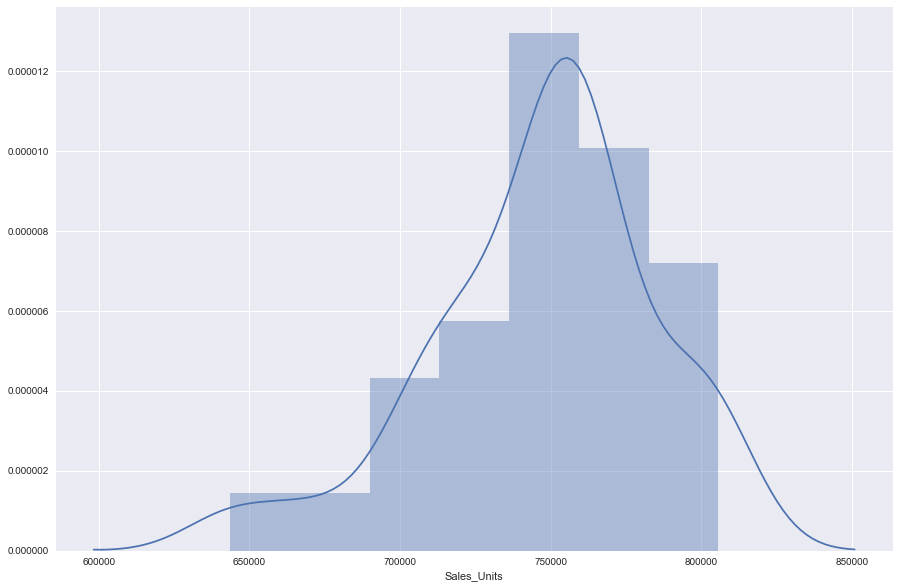

In [30]:
# Sales_Units
plt.subplots(figsize=(15,10))
sns.distplot(data['Sales_Units'])
plt.show()

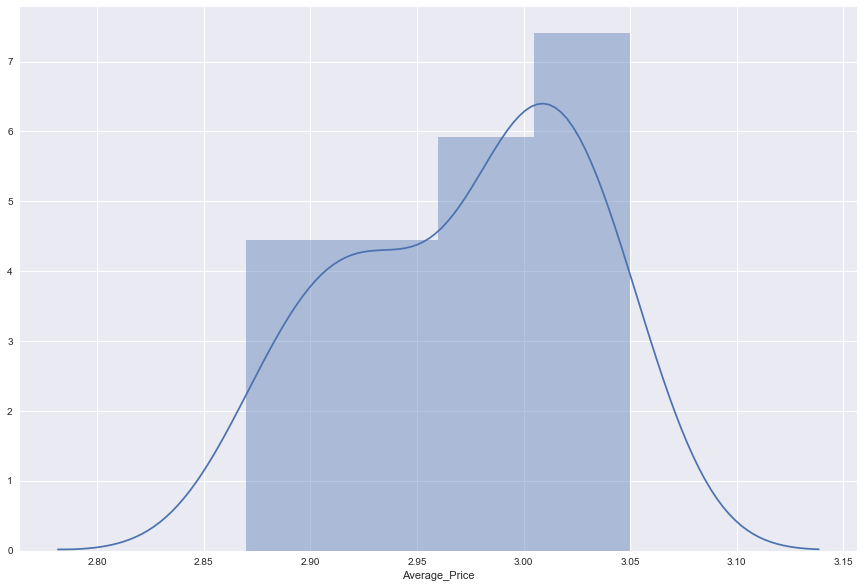

In [31]:
# Average_Price
plt.subplots(figsize=(15,10))
sns.distplot(data['Average_Price'])
plt.show()

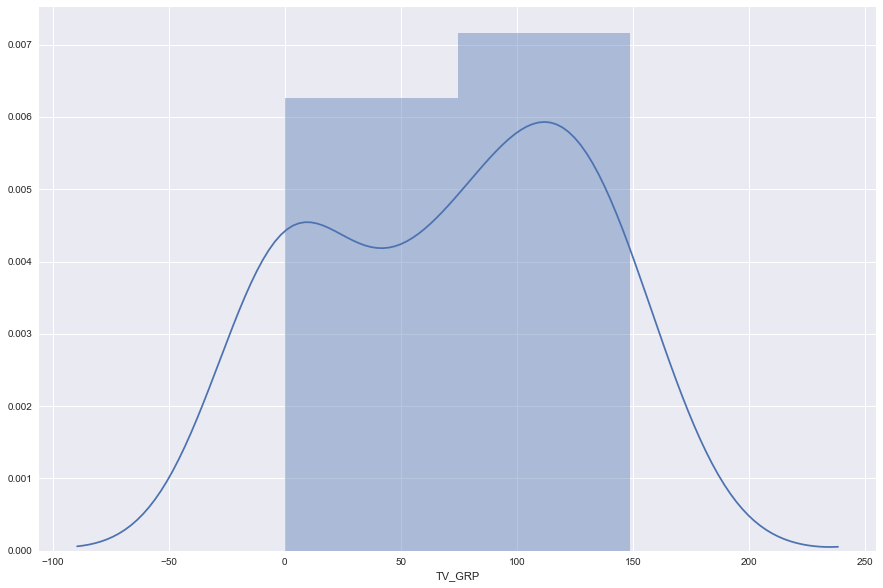

In [32]:
# TV_GRP
plt.subplots(figsize=(15,10))
sns.distplot(data['TV_GRP'])
plt.show()

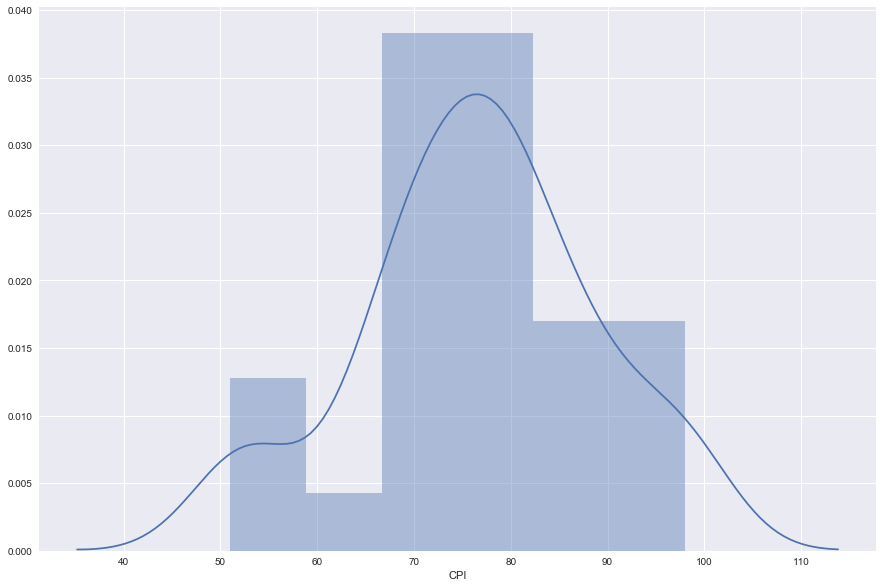

In [33]:
# CPI
plt.subplots(figsize=(15,10))
sns.distplot(data['CPI'])
plt.show()

### Correlation Heatmap

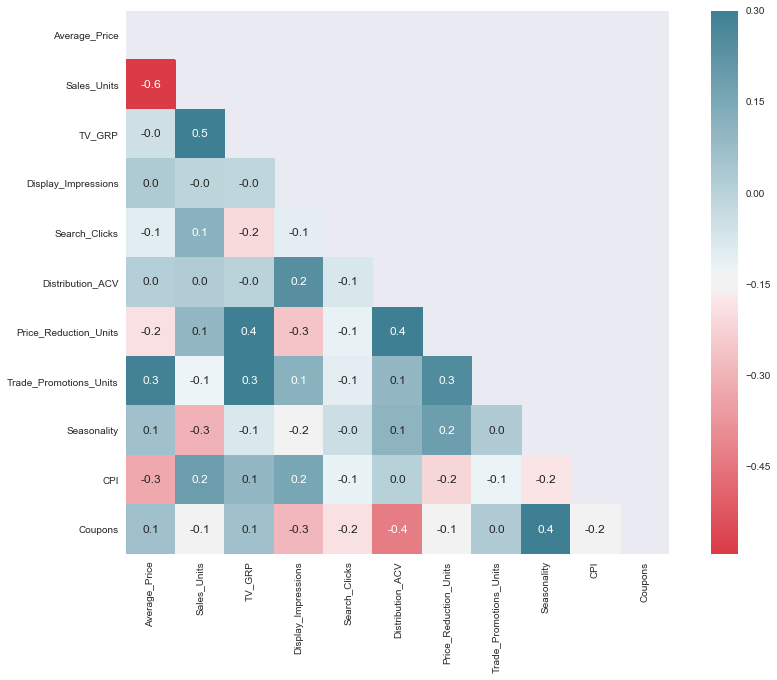

In [10]:
data_corr = data.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 220, as_cmap=True)
plt.subplots(figsize=(15,10))
with sns.axes_style("white"):
    ax = sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, square=True,annot=True, fmt=".1f")

Sales_Units doesn't have any very strong correlations, but the strongest are these 3, which we will visualize in more detail:
* Average_Price
* TV_GRP
* Seasonality
* CPI

### Correlation Scatter Plots

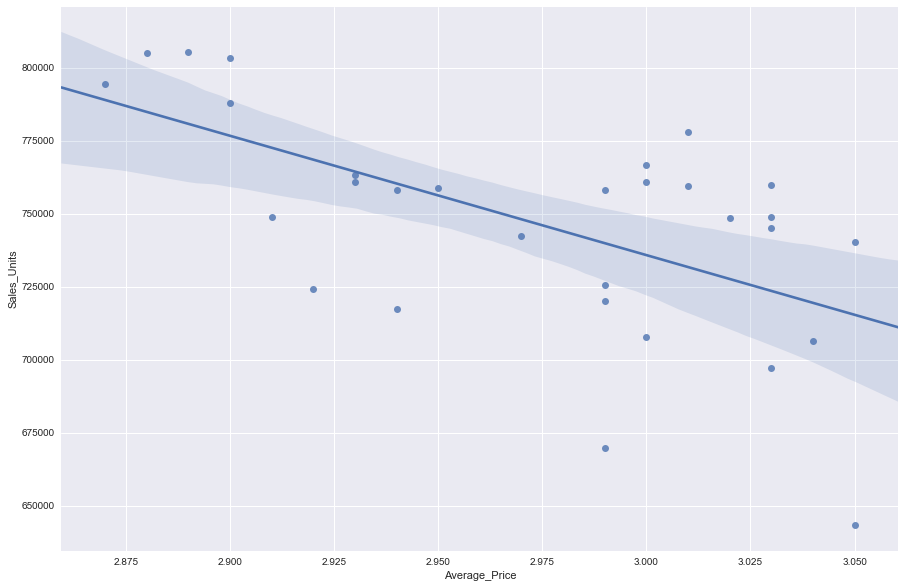

In [11]:
# Average_Price scatter plot
plt.subplots(figsize=(15,10))
sns.regplot(x=data["Average_Price"], y=data["Sales_Units"])
plt.show()

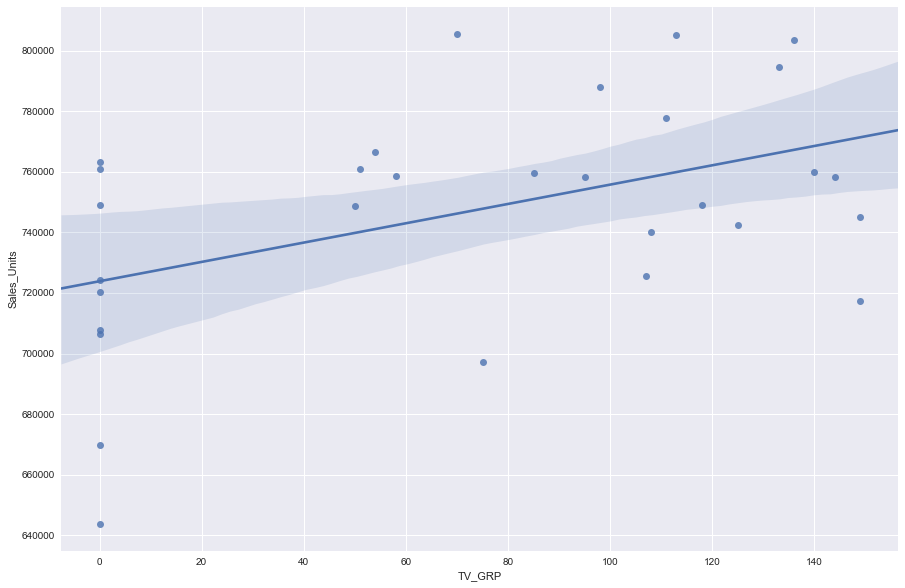

In [12]:
# TV_GRP scatter plot
plt.subplots(figsize=(15,10))
sns.regplot(x=data["TV_GRP"], y=data["Sales_Units"])
plt.show()

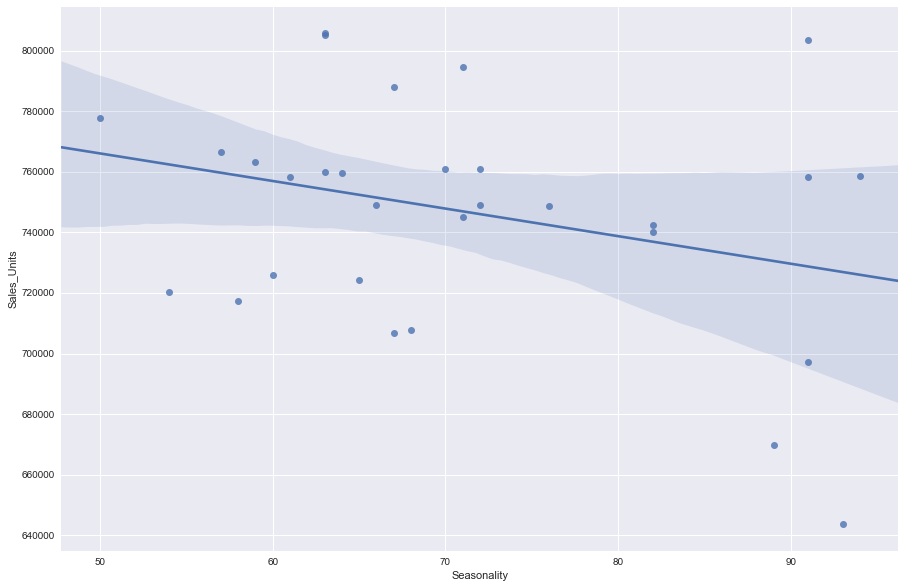

In [13]:
# Seasonality scatter plot
plt.subplots(figsize=(15,10))
sns.regplot(x=data["Seasonality"], y=data["Sales_Units"])
plt.show()

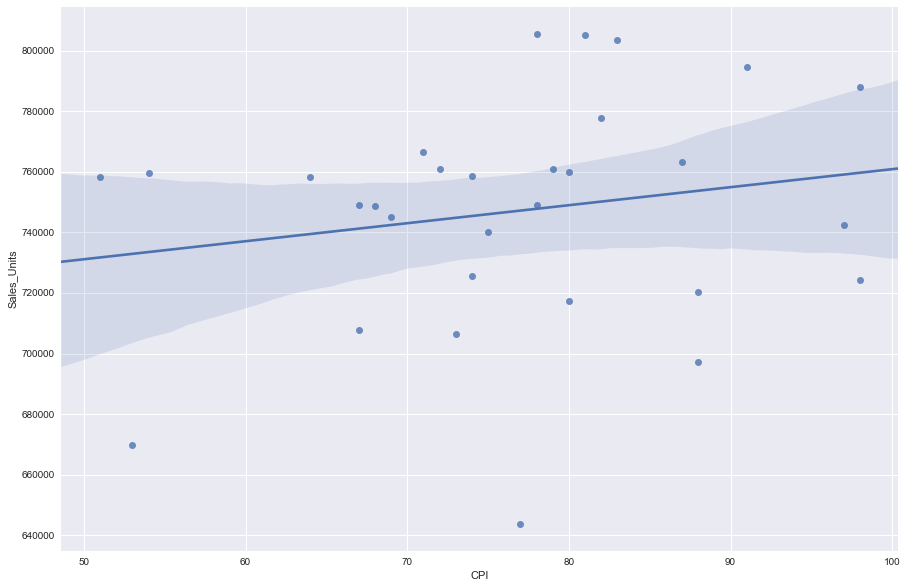

In [14]:
# CPI scatter plot
plt.subplots(figsize=(15,10))
sns.regplot(x=data["CPI"], y=data["Sales_Units"])
plt.show()

# Model Development<a id='link5'></a>
[Back to Top](#back to top)

We're building out a linear regression using OLS. To start, here is a brief description of OLS and the rationale for using it in this situation:
* Meeting the assumptions of OLS is critical to being confident in interpreting the results of the model. [Here are descriptions of those assumptions:](http://www.learndatasci.com/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/)
    * __Assumption 1: Linearity.__ A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain our data.
    * __Assumption 2: No multicollinearity.__ Predictor variables are not collinear, i.e., they aren't highly correlated. If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the Adj. R-squared (see below).
    * __Assumption 3: Zero conditional mean.__ The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.
    * __Assumption 4: Homoskedasticity.__ The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable; that is, there is no pattern in the residuals. In statistical jargon, the variance is constant.
    * __Assumption 5: No autocorrelation (serial correlation).__ Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.

Linear Regression resources:
* https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
* https://becominghuman.ai/stats-models-vs-sklearn-for-linear-regression-f19df95ad99b
* http://www.learndatasci.com/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/


We use the statsmodels package in python for this example, although you're more than welcome to use the scikit learn LinearRegression package, which is just as effective. The reason for our selection is because the statsmodels output can be formatted into the classic summary output that many readers are used to.

### Model 1<a id='link5a'></a>
[Back to Top](#back to top)

__Explanatory Variables:__ By putting everything into the model, what is the result? This requires little consideration of the EDA that was performed, and is primarily done out of curiosity.
* Everything and the kitchen sink

__Results:__
* The adjusted R-squared is very low (0.526), and only two of the coefficients have P-values that come close to being significant.
* Necessitates further model refinement.

In [15]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm1 = smf.ols(formula='Sales_Units ~ Average_Price + TV_GRP + Display_Impressions + Search_Clicks + Distribution_ACV + Price_Reduction_Units + Trade_Promotions_Units + Seasonality + CPI + Coupons', data=data).fit()

# print the coefficients
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            Sales_Units   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     4.219
Date:                Thu, 12 Apr 2018   Prob (F-statistic):            0.00342
Time:                        11:46:13   Log-Likelihood:                -340.77
No. Observations:                  30   AIC:                             703.5
Df Residuals:                      19   BIC:                             719.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                2.1

### Model 2<a id='link5b'></a>
[Back to Top](#back to top)

__Explanatory Variables:__ These variables were selected because they had the strongest correlations with the dependent variable of Sales Units
* Average Price
* TV_GRP
* Seasonality
* CPI

__Results:__
* Our adjusted R-squared has increased very slightly from the previous model, but it is still very low.
* CPI's P value is large, so it cannot reject the null hypothesis that the coefficient could be 0
* The [Durbin-Watson score](http://www.statisticshowto.com/durbin-watson-test-coefficient/) is 1.316, which is outside the normal range (1.5 - 2.5), and cause for concern of autocorrelation. 

In [24]:
# Choose only variables which had correlation coefficients > 0.1 or <-0.1 with the dependent variable
lm2 = smf.ols(formula='Sales_Units ~ Average_Price + TV_GRP + Seasonality + CPI', data=data).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:            Sales_Units   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     9.632
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           7.43e-05
Time:                        11:48:07   Log-Likelihood:                -344.32
No. Observations:                  30   AIC:                             698.6
Df Residuals:                      25   BIC:                             705.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.994e+06   2.85e+05      6.990

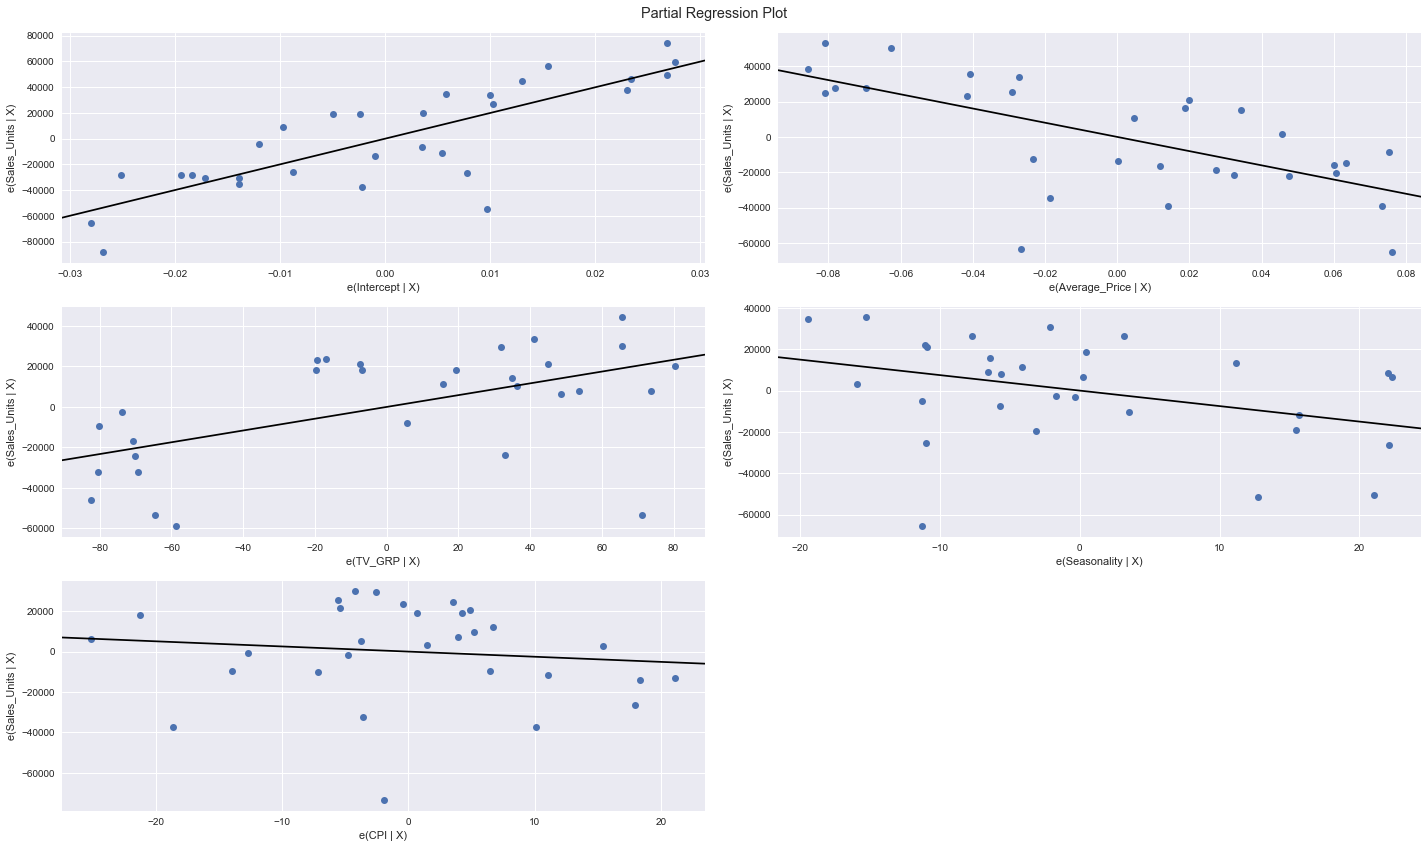

In [17]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(lm2, fig=fig)

### Model 3<a id='link5c'></a>
[Back to Top](#back to top)

__Explanatory Variables:__ Dropping CPI because of it's large P-value, which meant that you could not reject the null hypothesis
* Average Price
* TV_GRP
* Seasonality

__Results:__
* Largest adjusted R-Squared value thus far (0.555). Still low, but represents the best fit model.
* All coefficients have relatively low P-values. Seasonality is the largest, but 
* the [Durbin-Watson score](http://www.statisticshowto.com/durbin-watson-test-coefficient/) is still lower than 1.5, which suggests there is positive autocorrelation. While values less than 2 are common in time-series data, and represent positive autocorrelation, anything less than 1.5 should be addressed as it could potentially impact the model. Autocorrelation violates assumption 5 of OLS.

In [34]:
lm3 = smf.ols(formula='Sales_Units ~ Average_Price + TV_GRP + Seasonality', data=data).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:            Sales_Units   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     13.04
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           2.18e-05
Time:                        12:04:36   Log-Likelihood:                -344.54
No. Observations:                  30   AIC:                             697.1
Df Residuals:                      26   BIC:                             702.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.92e+06   2.55e+05      7.535

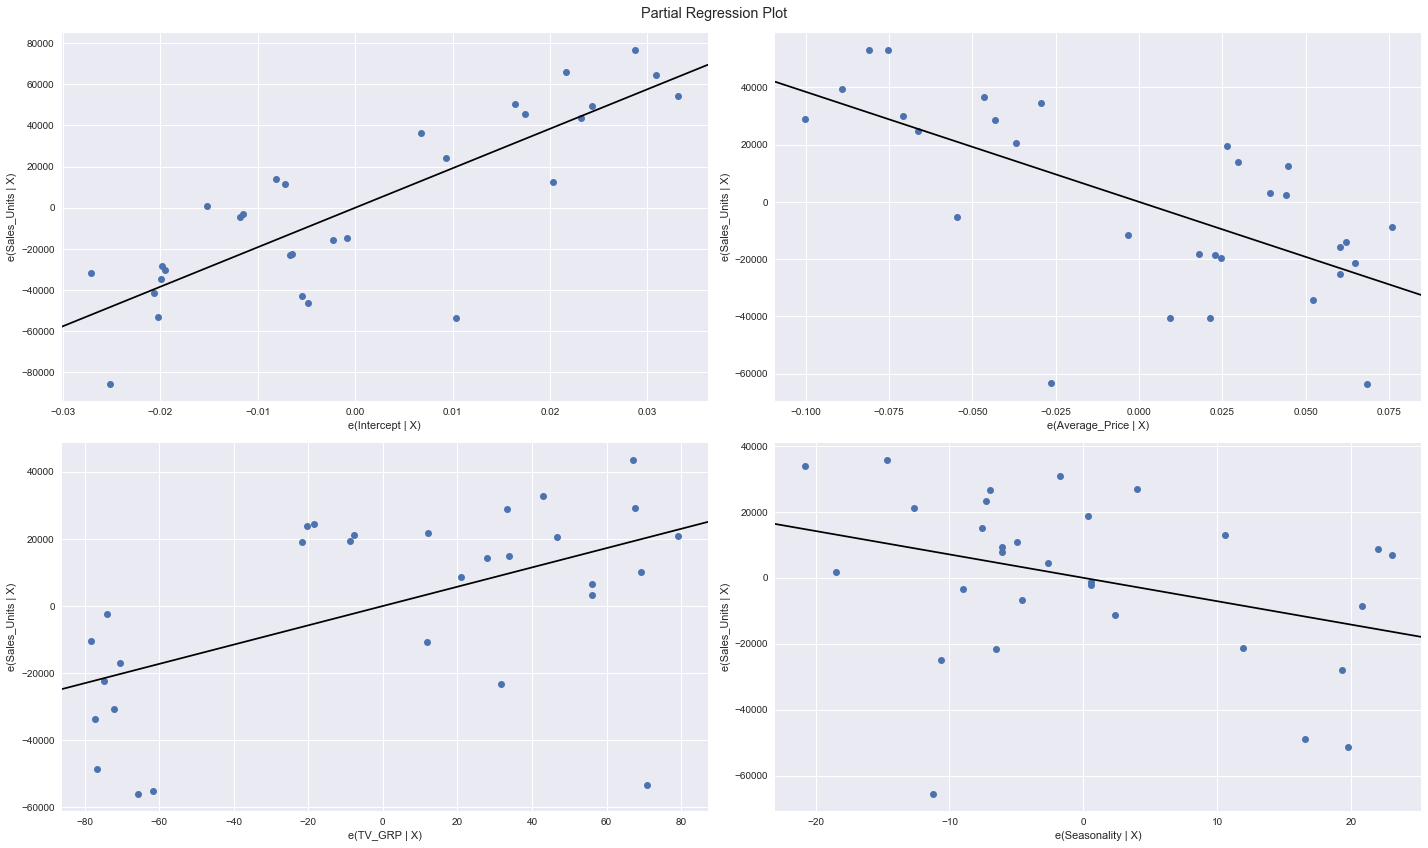

In [35]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(lm3, fig=fig)

# Model Interpretation<a id='link6'></a>
[Back to Top](#back to top)

The model that we developed can be summarized by the following equation:

![image.png](https://user-images.githubusercontent.com/30674288/38699566-3559d81e-3e4d-11e8-8ebf-5c617b767334.png)

This can be interpreted in english in the following sentences:
* An increase in Average_Price by 1 unit will result in a -3.847e+05 unit change in Sales_Units, holding all else equal.
* An increase in TV_GRP by 1 unit will result in a 287.5254 unit change in Sales_Units, holding all else equal.
* An increase in Seasonality by 1 unit will result in a -709.4663 change in Sales_Units, holding all else equal.

### Limitations<a id='link6a'></a>
[Back to Top](#back to top)

There are many limitations associated with this analysis, and it is crucial that they are understood before these results are used to make important decisions. Limitations in this example are associated with the data, model selection, and analyst bias.

#### Data Limitations
* The data only has 30 observations, which is very small. If this data represents daily amounts, only having 30 days worth would mean that there was still much more that could be discovered as far as trends and significance are concerned.
* We might not have all the data necessary to make an informed decision on all the features to include.

#### Model Selection
* While we used a multivariate linear regression, this model might not be the best choice in order to fit the data. This model was chosen primarily for convenience, which strongly suggests that this needs to be reevaluated when developing this notebook further.
* Autocorrelation is present in our model. This means that previous terms of any given predictor have the potential to be influencing current and future values. This can be identified in the Durbin-Watson score of 1.38 in our lm3 model.


### Recommendations to a Marketing Manager<a id='link6b'></a>
[Back to Top](#back to top)

A model is not generally just made for the fun of it, and this model is no different. This exercise has been completed under the assumption that it will be used to provide recommendations to a marketing manager at a company. 

While I certainly can provide recommendations from this model, anything stated should be taken with a "grain of salt." As was explained in the limitations section, there are many reasons that the conclusions from this model might not be accurate. Without a more robust dataset and model selection/development process, any actions guided by this model should be validated by someone with domain expertise.

Given the limitations, what would this model recommend a marketing manager to do? This model suggests that the most significant impact to improving sales units comes from TV_GRP, which is the weekly GRPs for TV bought by the brand. The GRPs can be translated into impressions using the following conversion rate: 1 GRP = 1,200,000 impressions. By increasing TV GRP's, the marketing manager would have a statistics-backed rationale that sales units will increase holding all else constant. 

This model also tells us about the features that were not included in the model. While they were likely not included due to small sample size, any feature that was excluded due to statistically insignificant regression coefficients means that it is not proven to actually impact the sales units of the brand. However, to a marketing manager, increasing sales units likely is not the only objective; brand awareness and perception are key to a marketing manager's position and overall company success. While this regression suggests that budget spent on display impressions, search clicks, and others might not directly improve sales, they are almost certainly not something that the marketing manager should entirely allocated budget away from. 

This marketing manager should begin to measure things such as brand awareness, market share, price perception, and other holistic metrics, and begin to build regressions like this for all of the relevant KPIs of the company. By looking at multiple measures and models, the decisions for how to allocate budget become much more complicated, but have less chance of directing you down the wrong path due to the limitations of just one model.